# Linear Regression Model

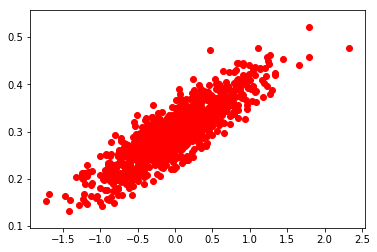

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# 随机生成1000个样本点，分布在y = 0.1 * x + 0.3
num_points = 1000
vector_set = []
for i in range(num_points):
    x_1 = np.random.normal(loc = 0.0, scale = 0.55)
    noise = np.random.normal(loc = 0.0, scale = 0.03)
    y_1 = 0.1 * x_1 + 0.3 + noise
    vector_set.append([x_1, y_1])
# generate some samples
x_data = [v[0] for v in vector_set]
y_data = [v[1] for v in vector_set]

plt.scatter(x_data, y_data, c = 'r')
plt.show()

# 通过算法来训练模型

initial: W = [0.82185245], b = [0.], loss = 0.24627910554409027
after training: W = [0.6058171], b = [0.29768038], loss = 0.07801774889230728
after training: W = [0.45384353], b = [0.2981668], loss = 0.03874567523598671
after training: W = [0.34740567], b = [0.29850903], loss = 0.019481943920254707
after training: W = [0.27285972], b = [0.2987487], loss = 0.010032719001173973
after training: W = [0.22064994], b = [0.29891655], loss = 0.005397694651037455
after training: W = [0.18408373], b = [0.29903412], loss = 0.0031241257674992085
after training: W = [0.15847382], b = [0.29911646], loss = 0.0020088967867195606
after training: W = [0.1405374], b = [0.29917413], loss = 0.0014618554851040244
after training: W = [0.12797524], b = [0.2992145], loss = 0.0011935211950913072
after training: W = [0.11917708], b = [0.2992428], loss = 0.0010618979576975107
after training: W = [0.11301511], b = [0.2992626], loss = 0.0009973342530429363
after training: W = [0.10869944], b = [0.29927647], loss = 

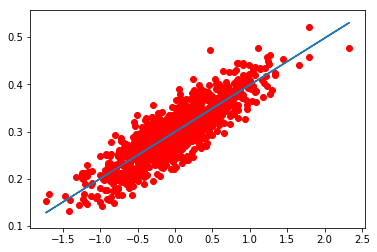

In [11]:
# 生成1-D的权重矩阵W，取值是[-1, 1]之间的随机数
W = tf.Variable(tf.random_uniform(shape = [1], minval = -1.0, maxval = 1.0), name = "Weight")
# 生成1-D的偏置bias，初始值设为0
b = tf.Variable(tf.zeros(shape = [1], name = "bias"))
# 经过计算得出理论值y_hat
y_hat = W * x_data + b
# 创建损失函数
losses = tf.reduce_mean(input_tensor = tf.square(y_hat - y_data), name = "losses")
# 利用梯度下降算法来优化模型参数，创建优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
# 优化的目标
train_op = optimizer.minimize(losses, name = "train")
init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    # 输出训练好的参数W和偏置b的值，以及损失值loss
    print("initial: W = {0}, b = {1}, loss = {2}".format(sess.run(W),sess.run(b), sess.run(losses)))
    # 训练迭代20次
    for step in range(20):
        sess.run(train_op)
        print("after training: W = {0}, b = {1}, loss = {2}".format(sess.run(W), sess.run(b), sess.run(losses)))
    plt.scatter(x_data, y_data, c = 'r')
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    plt.show()